In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1-point2)

In [15]:
def hierarchical_clustering(data):
    num_points = len(data)
    distances = np.zeros((num_points, num_points))
    
    for i in range(num_points):
        for j in range(i+1, num_points):
            distances[i, j] = euclidean_distance(data[i], data[j])
            
            
    clusters = [set([i]) for i in range(num_points)]
    
    while len(clusters) > 1:
        min_distance = np.inf
        merge_indices = (0,0)
        
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = np.min(distances[list(clusters[i])][:, list(clusters[j])])
                if distance < min_distance:
                    min_distance = distance
                    merge_indices = (i, j)
                    
        i, j = merge_indices
        clusters[i] = set(list(clusters[i]) + list(clusters[j]))
        del clusters[j]
    return list(clusters[0])

In [20]:
def divisive_clustering(data, k):
    num_points = len(data)
    clusters = [set(range(num_points))]
    
    while len(clusters) < k:
        max_distace = 0
        split_indices = (0,0)
        
        for cluster_index in range(len(clusters)):
            cluster = list(clusters[cluster_index])
            for i in range(len(cluster)):
                for j in range(i+1, len(cluster)):
                    distance = euclidean_distance(data[cluster[i]], data[cluster[j]])
                    if distance > max_distace:
                        max_distace = distance
                        split_indices = (cluster_index, i , j)
        cluster_index, i, j = split_indices
        new_cluster1 = set(list(clusters[cluster_index])[:i])
        new_cluster2 = set(list(clusters[cluster_index])[i:j])
        clusters[cluster_index] = new_cluster1
        clusters.append(new_cluster2)
        
    return clusters

In [17]:
#Creating synhetic data
np.random.seed(0)

data = np.concatenate([np.random.randn(50,2) * 0.5 + np.array([2,2]),
                      np.random.randn(50,2) * 0.5 + np.array([-2,-2]
                      )])

In [21]:
#Running Hierarchical Clustering
hierarachical_cluster = hierarchical_clustering(data)

#Running Divisive Clustering
divisive_cluster = divisive_clustering(data, k=2)

Text(0.5, 1.0, 'Divisive Hierarchical Clustering')

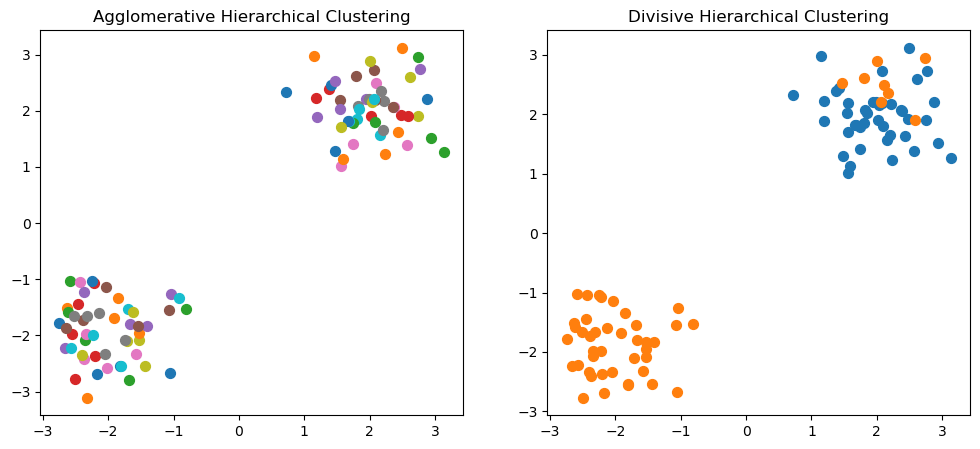

In [25]:
#Plot the results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for point_index in hierarachical_cluster:
    plt.scatter(data[point_index, 0], data[point_index, 1], s=50)
plt.title("Agglomerative Hierarchical Clustering")


plt.subplot(1,2,2)
for cluster in divisive_cluster:
    cluster_points = data[list(cluster)]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50)
plt.title("Divisive Hierarchical Clustering")

In [1]:
import numpy as np

In [2]:
#Create synthetic data
np.random.seed(0)

In [6]:
data = np.concatenate([np.random.randn(50,2) * 0.5 +np.array([2,2]), 
                      np.random.randn(50,2) * 0.5 + np.array([-2,-2])])

In [7]:
data

array([[ 1.81540908,  1.88031041],
       [ 2.5498298 ,  2.32763187],
       [ 2.32006576,  1.19152198],
       [ 1.98783694,  1.63098455],
       [ 2.1399623 ,  1.95092481],
       [ 2.45508945,  2.15860911],
       [ 2.39316398,  1.76679045],
       [ 1.52777687,  1.79497515],
       [ 1.99148979,  2.18957587],
       [ 3.12965448,  1.97887142],
       [ 1.5220275 ,  1.82700911],
       [ 1.76820201,  2.24074074],
       [ 1.22960149,  2.031631  ],
       [ 2.07825327,  2.11609052],
       [ 1.70134197,  1.88103914],
       [ 1.28796955,  1.75334006],
       [ 1.72856926,  2.20802502],
       [ 1.42190878,  2.39059905],
       [ 2.74724227,  0.96500749],
       [ 2.21312937,  2.33845402],
       [ 1.68128149,  1.80136409],
       [ 1.93355971,  1.85110456],
       [ 1.84549352,  1.1619981 ],
       [ 2.57616578,  2.5398093 ],
       [ 1.59331787,  1.26678784],
       [ 2.26053244,  1.71210602],
       [ 2.07097658,  1.84033579],
       [ 2.34576938,  2.34737457],
       [ 1.63720131,

## Divisive Clustering

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [12]:
#Get the linkage matric
linkage_matrix = linkage(data, 'ward', 'euclidean')

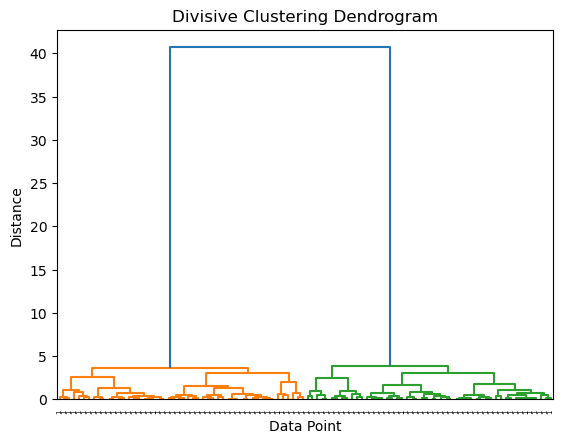

In [13]:
#Get the cluster assignment
cluster_assignment = fcluster(linkage_matrix, 2)

#Plot dendrogram
dendrogram(linkage_matrix, labels=cluster_assignment)

#Set Tittle and axis
plt.title('Divisive Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

## Agglomerative Clustering

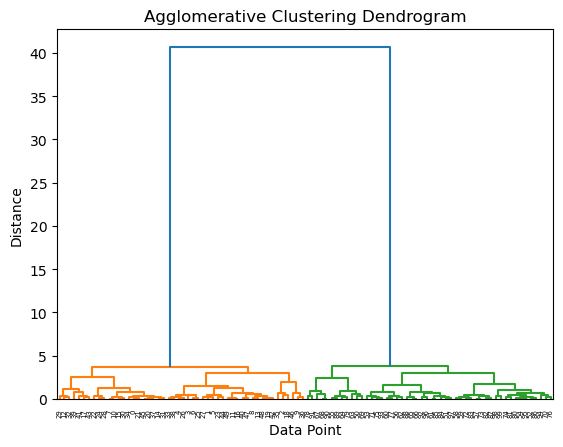

In [14]:
#Get the linkage matric
linkage_matrix = linkage(data, 'ward', 'euclidean')

#Plot dendrogram
dendrogram(linkage_matrix)


#Set Tittle and axis
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()